In [11]:
# ============================================================================
# GHG (GREENHOUSE GAS) ANALYSIS FOR TOP 10 COUNTRIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [12]:
# ============================================================================
# LOAD ALL DATA
# ============================================================================

print("\n STEP 1: Loading Data...")

# Load historical emissions (with sectors)
emissions_raw = pd.read_csv("Datasets/historical_emissions.csv")
print(f"   Emissions data: {emissions_raw.shape}")

# Load predictions (to identify top 10 countries by 2030)
predictions_total = pd.read_csv('emissions_predictions_2021_2030.csv')
print(f"   Predictions data: {predictions_total.shape}")

# Load GDP and Population data
gdp_pop = pd.read_csv('gdp_population_predicted_2024.csv')
print(f"   GDP/Population data: {gdp_pop.shape}")

# Year columns from emissions data
year_cols = [col for col in emissions_raw.columns if col.isdigit()]
latest_year = max(year_cols)
print(f"   Years available: {min(year_cols)} - {latest_year}")


 STEP 1: Loading Data...
   Emissions data: (11058, 37)
   Predictions data: (1530, 6)
   GDP/Population data: (6804, 11)
   Years available: 1990 - 2020


In [13]:
# ============================================================================
# IDENTIFY TOP 10 COUNTRIES BY 2030 PREDICTIONS
# ============================================================================

print("\n STEP 2: Identifying Top 10 Countries by 2030...")

top10_2030 = predictions_total[predictions_total['Year'] == 2030].nlargest(10, 'Predicted_Emissions')

TOP10_COUNTRIES = top10_2030['ISO'].tolist()

print(f"\n{'Rank':<5} {'Country':<25} {'Predicted 2030 Emissions':>25}")
print("-"*60)
for rank, (_, row) in enumerate(top10_2030.iterrows(), 1):
    print(f"{rank:<5} {row['Country']:<25} {row['Predicted_Emissions']:>22,.2f}")


 STEP 2: Identifying Top 10 Countries by 2030...

Rank  Country                    Predicted 2030 Emissions
------------------------------------------------------------
1     China                                  14,910.26
2     India                                   5,264.27
3     United States                           4,227.59
4     Russia                                  2,108.45
5     Indonesia                               1,972.37
6     Brazil                                  1,738.57
7     Iran                                    1,046.53
8     Democratic Republic of the Congo                 929.47
9     Japan                                     803.71
10    Pakistan                                  784.98


 GREENHOUSE GAS ANALYSIS - TOP 10 COUNTRIES

 Available Gas Types:
   1. All GHG
   2. CO2
   3. CH4
   4. N2O
   5. F-Gas

 Gas data shape: (776, 37)
   Countries: 194

 Top 10 countries gas data shape: (40, 37)

 OVERALL GHG BREAKDOWN (Top 10 Countries Combined)

Gas Type          Emissions (MtCO2e)      % of Total
--------------------------------------------------
CO2                      21,891.14           76.7%
CH4                       4,476.69           15.7%
N2O                       1,584.54            5.6%
F-Gas                       583.90            2.0%
--------------------------------------------------
TOTAL                    28,536.27          100.0%


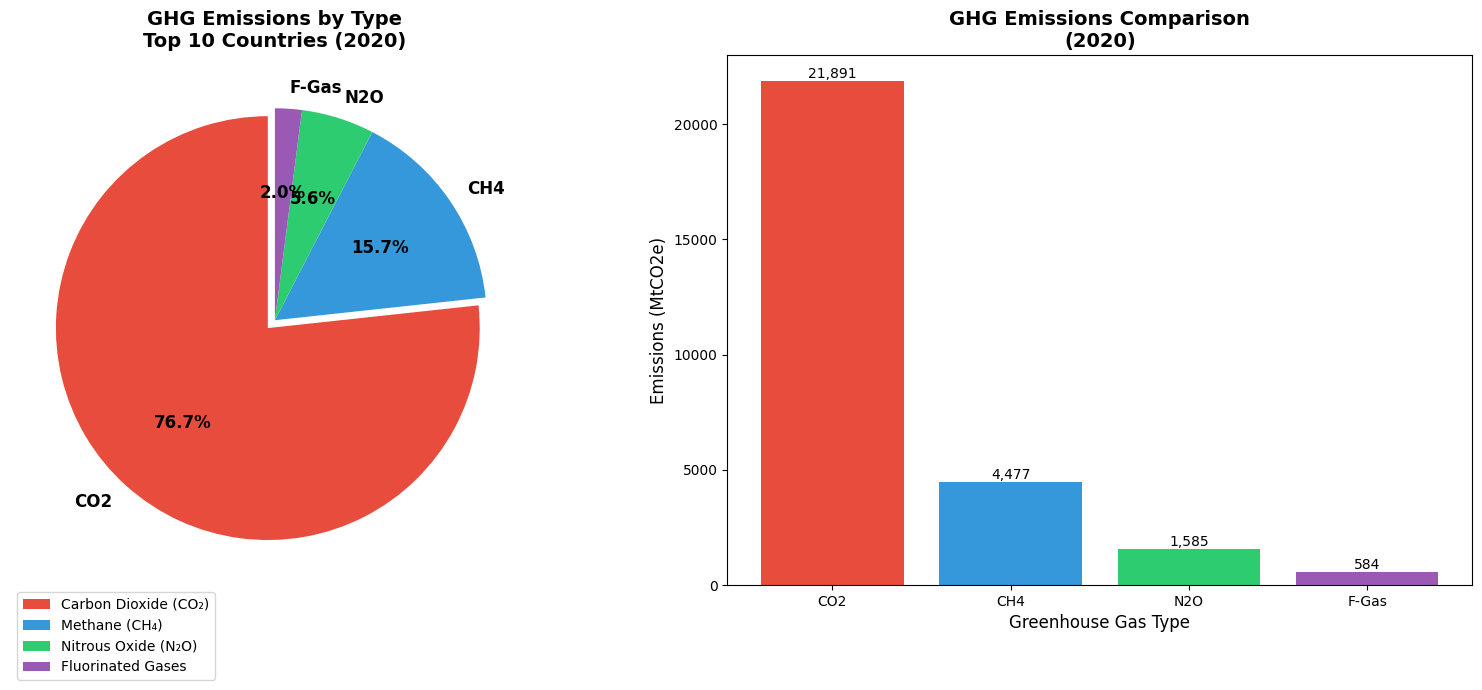


 GHG BREAKDOWN BY COUNTRY

GHG Emissions by Country and Gas Type (2020) - MtCO2e:
Gas                                    CO2      CH4     N2O   F-Gas     Total
Country                                                                      
China                             10296.84  1186.57  537.23  274.98  12295.62
United States                      4099.07   750.83  260.82  178.40   5289.12
India                              2165.20   698.50  279.92   23.33   3166.95
Russia                             1083.43   618.82   70.97   26.75   1799.97
Indonesia                          1053.73   342.72   75.68    3.70   1475.83
Brazil                              798.61   459.01  201.77   10.25   1469.64
Japan                               982.26    25.79   18.51   36.21   1062.77
Iran                                616.62   174.64   39.72   13.73    844.71
Democratic Republic of the Congo    604.27    50.38   30.95    2.45    688.05
Pakistan                            191.11   169.43   68.97

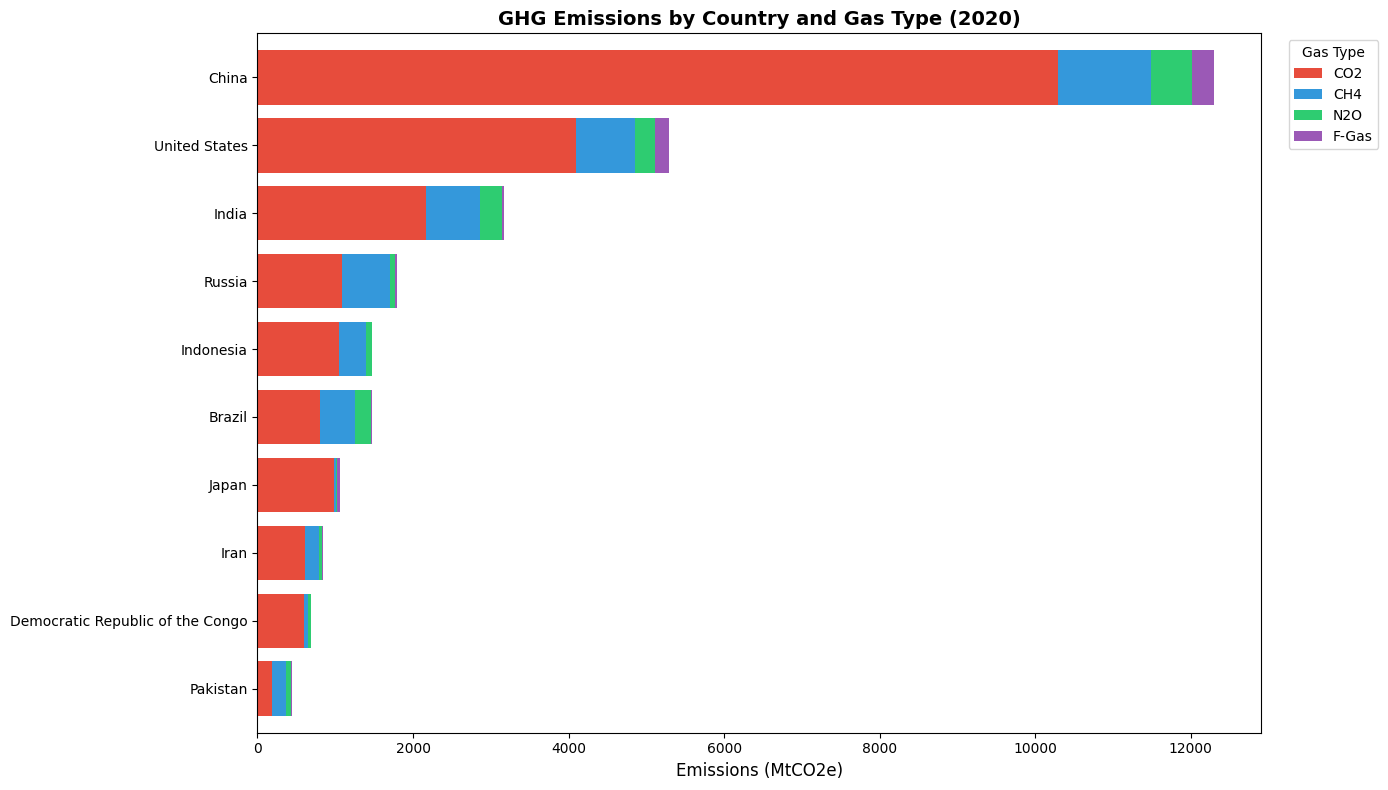

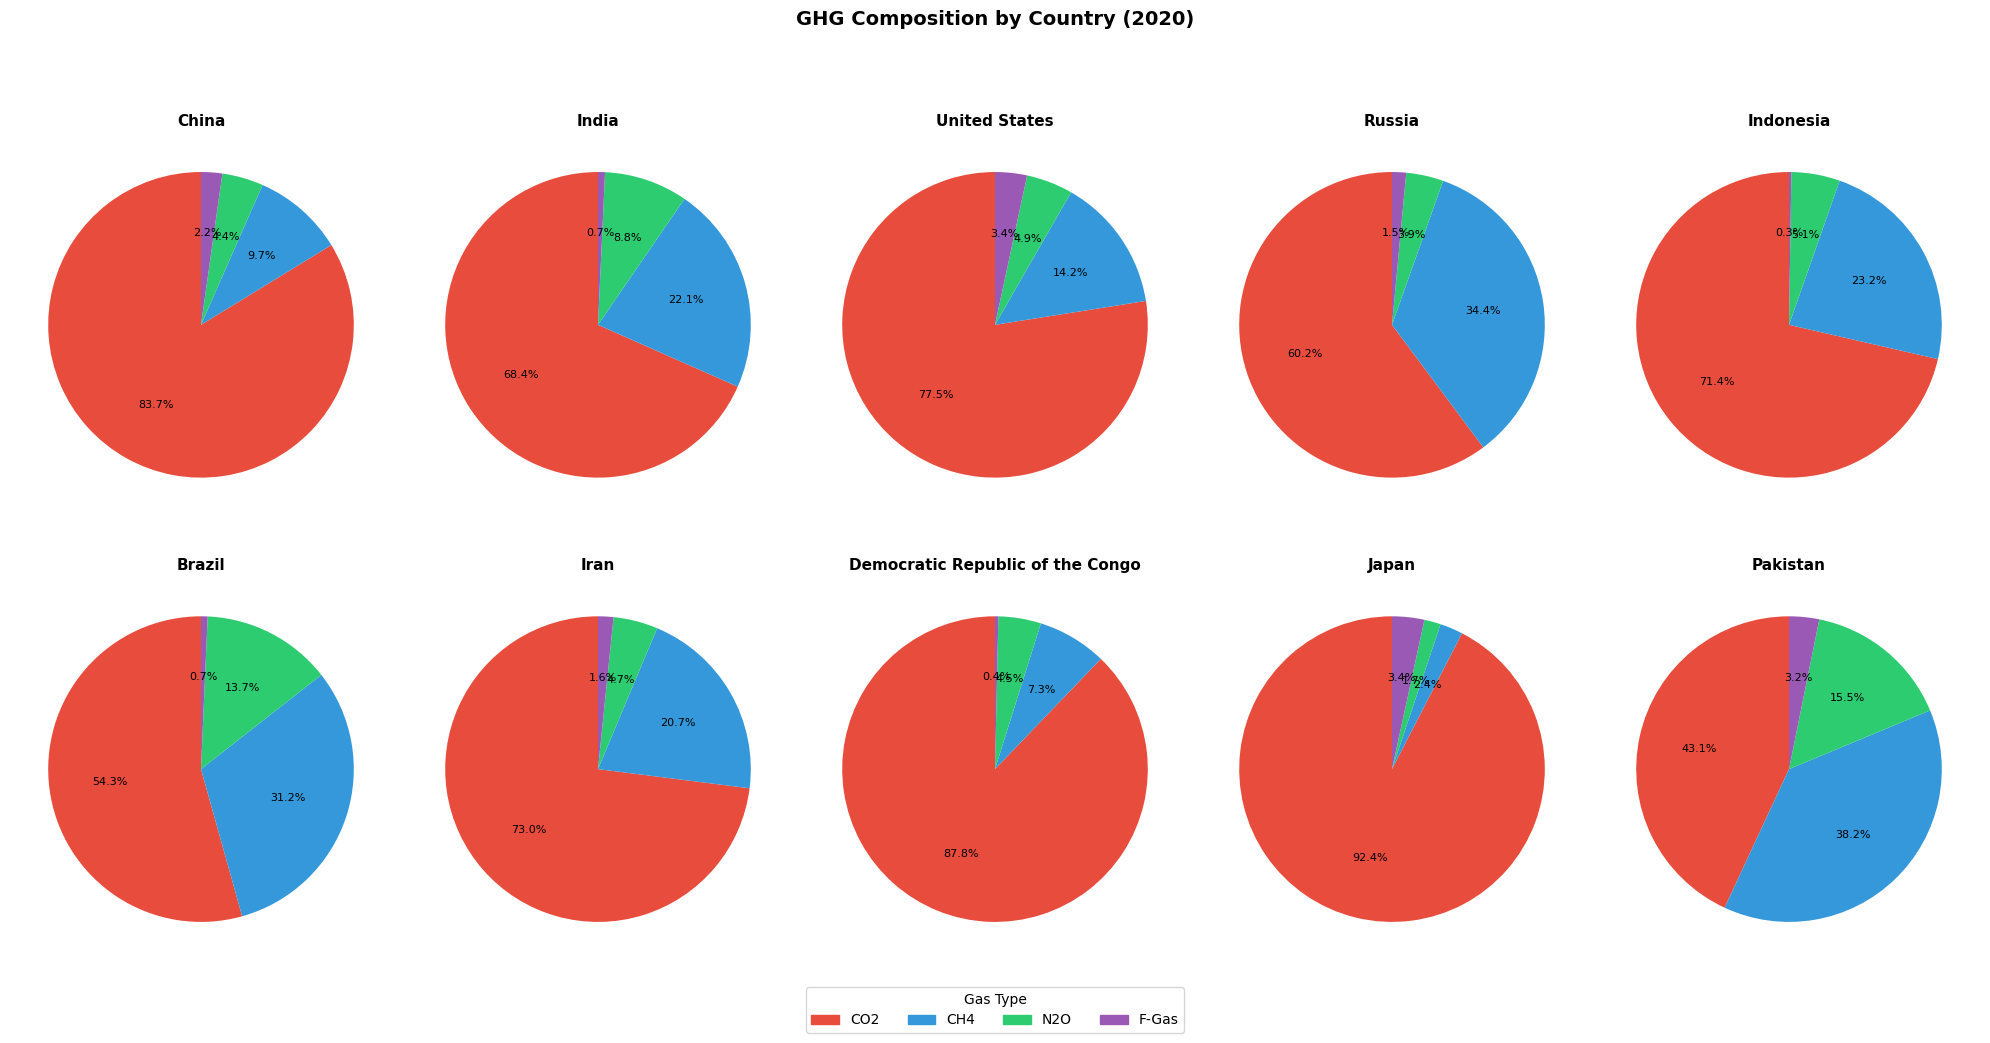


 GHG TRENDS OVER TIME


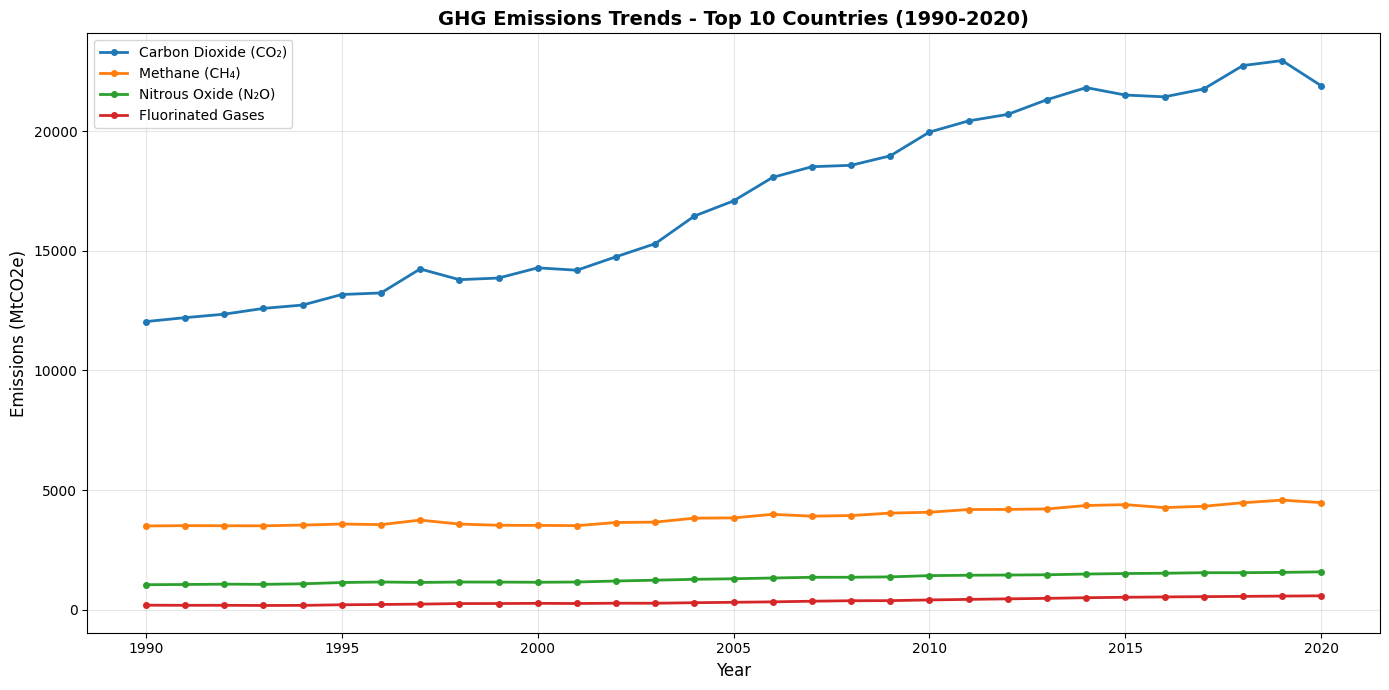

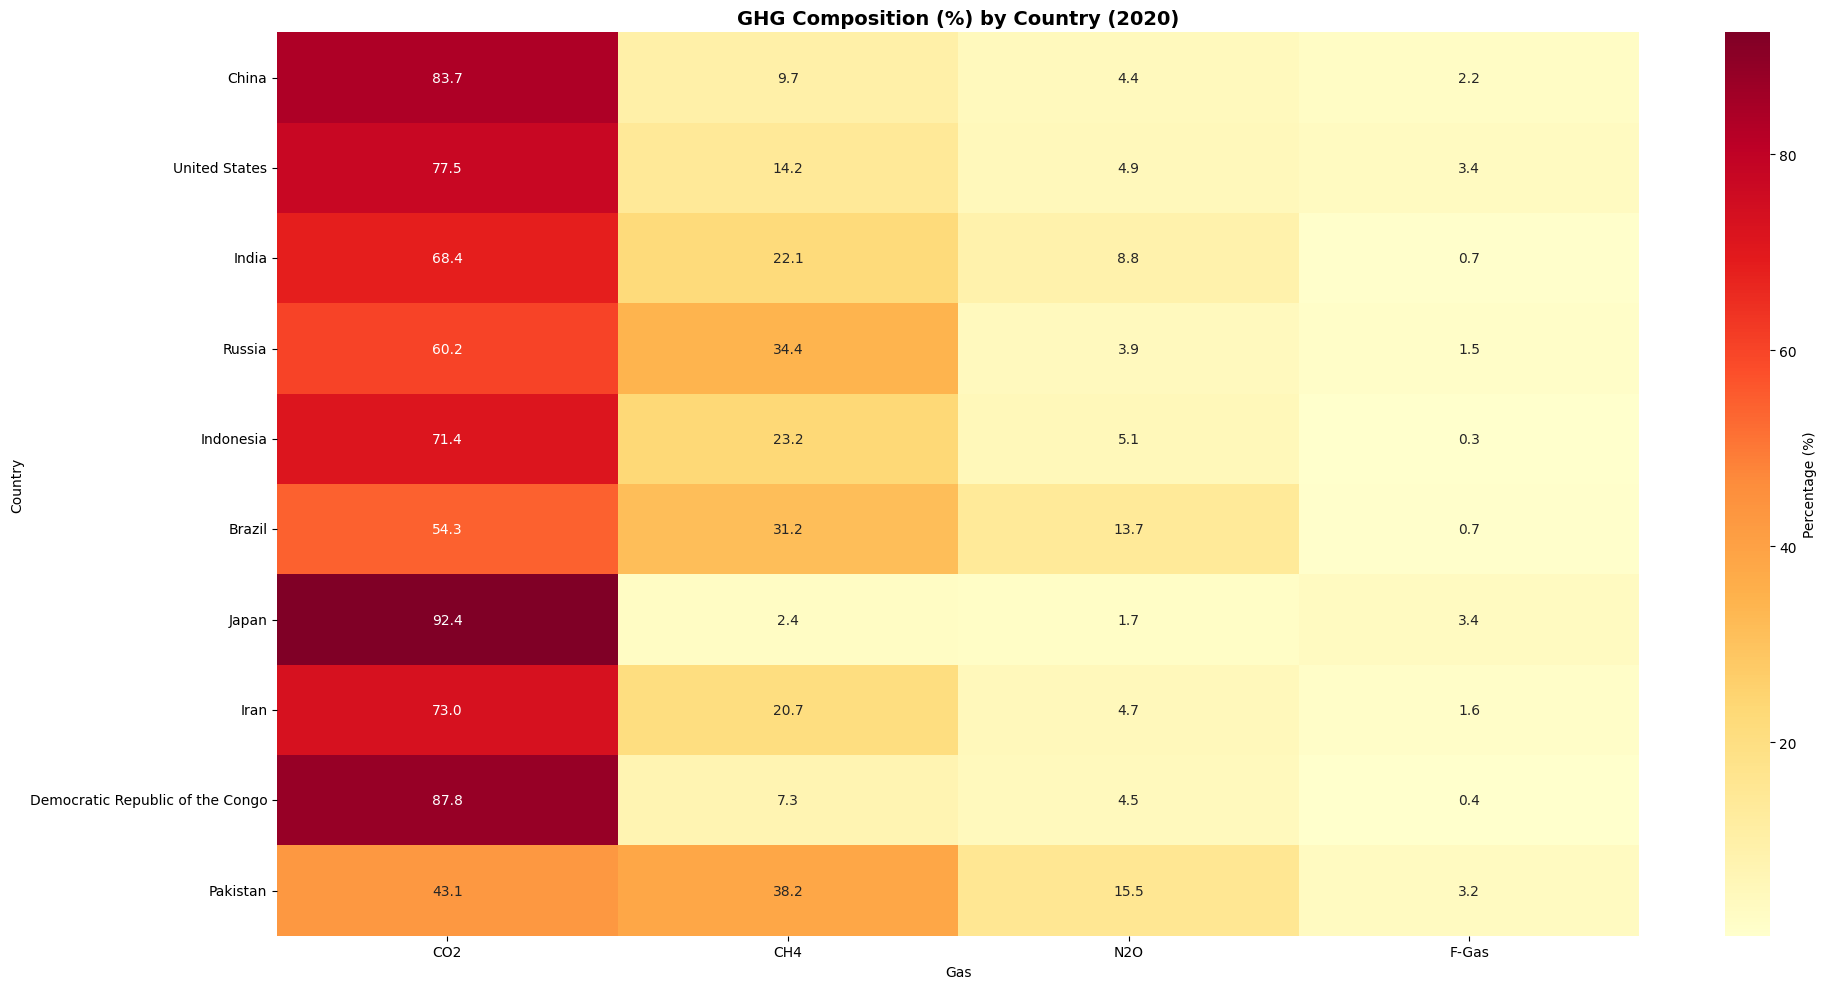


 SUMMARY: GHG ANALYSIS

 GREENHOUSE GAS BREAKDOWN (Top 10 Countries - 2020):

1. Carbon Dioxide (CO₂):
   - Total: 21,891.14 MtCO2e
   - Share: 76.7%
   - Main source: Fossil fuel combustion (energy, transport)

2. Methane (CH₄):
   - Total: 4,476.69 MtCO2e
   - Share: 15.7%
   - Main source: Agriculture (livestock), waste, natural gas

3. Nitrous Oxide (N₂O):
   - Total: 1,584.54 MtCO2e
   - Share: 5.6%
   - Main source: Agriculture (fertilizers), industrial processes

4. Fluorinated Gases:
   - Total: 583.90 MtCO2e
   - Share: 2.0%
   - Main source: Industrial processes (refrigerants, electronics)

 FILES SAVED:
   - ghg_overall_breakdown.png
   - ghg_by_country_stacked.png
   - ghg_pie_by_country.png
   - ghg_trends_over_time.png
   - ghg_heatmap.png



In [14]:
# ============================================================================
# STEP 1: EXPLORE GAS TYPES IN DATA
# ============================================================================

print("="*70)
print(" GREENHOUSE GAS ANALYSIS - TOP 10 COUNTRIES")
print("="*70)

# Load data
emissions_raw = pd.read_csv("Datasets/historical_emissions.csv")

# Year columns
year_cols = [col for col in emissions_raw.columns if col.isdigit()]
latest_year = max(year_cols)

# See all gas types
print("\n Available Gas Types:")
for i, gas in enumerate(emissions_raw['Gas'].unique(), 1):
    print(f"   {i}. {gas}")

# ============================================================================
# STEP 2: FILTER FOR GAS-SPECIFIC DATA
# ============================================================================

# Gas types to analyze (exclude "All GHG" as it's the total)
GAS_TYPES = ['CO2', 'CH4', 'N2O', 'F-Gas']

# Get total emissions by gas for each country (using "Total including LUCF" sector)
gas_data = emissions_raw[
    (emissions_raw['Gas'].isin(GAS_TYPES)) &
    (emissions_raw['Sector'] == 'Total including LUCF')
].copy()

print(f"\n Gas data shape: {gas_data.shape}")
print(f"   Countries: {gas_data['Country'].nunique()}")

# ============================================================================
# STEP 3: FILTER FOR TOP 10 COUNTRIES
# ============================================================================

# TOP10_COUNTRIES should already be defined, but if not:
# TOP10_COUNTRIES = ['CHN', 'IND', 'USA', 'RUS', 'IDN', 'BRA', 'IRN', 'COD', 'JPN', 'PAK']

top10_gas_data = gas_data[gas_data['ISO'].isin(TOP10_COUNTRIES)]

print(f"\n Top 10 countries gas data shape: {top10_gas_data.shape}")

# ============================================================================
# STEP 4: OVERALL GHG BREAKDOWN (TOP 10 COMBINED)
# ============================================================================

print("\n" + "="*70)
print(" OVERALL GHG BREAKDOWN (Top 10 Countries Combined)")
print("="*70)

gas_totals = top10_gas_data.groupby('Gas')[latest_year].sum().sort_values(ascending=False)

print(f"\n{'Gas Type':<15} {'Emissions (MtCO2e)':>20} {'% of Total':>15}")
print("-"*50)
total = gas_totals.sum()
for gas, value in gas_totals.items():
    pct = (value / total) * 100
    print(f"{gas:<15} {value:>18,.2f} {pct:>14.1f}%")
print("-"*50)
print(f"{'TOTAL':<15} {total:>18,.2f} {'100.0%':>15}")

# ============================================================================
# STEP 5: VISUALIZATION - OVERALL PIE CHART
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Pie chart
ax1 = axes[0]
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']
explode = [0.05 if i == 0 else 0 for i in range(len(gas_totals))]

wedges, texts, autotexts = ax1.pie(
    gas_totals, 
    labels=gas_totals.index, 
    autopct='%1.1f%%',
    colors=colors, 
    explode=explode, 
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

ax1.set_title(f'GHG Emissions by Type\nTop 10 Countries ({latest_year})', 
              fontsize=14, fontweight='bold')

# Add legend with full names
gas_names = {
    'CO2': 'Carbon Dioxide (CO₂)',
    'CH4': 'Methane (CH₄)',
    'N2O': 'Nitrous Oxide (N₂O)',
    'F-Gas': 'Fluorinated Gases'
}

ax1.legend([gas_names.get(g, g) for g in gas_totals.index], 
           loc='upper left', bbox_to_anchor=(0, 0))

# Bar chart
ax2 = axes[1]
bars = ax2.bar(gas_totals.index, gas_totals.values, color=colors)
ax2.set_ylabel('Emissions (MtCO2e)', fontsize=12)
ax2.set_xlabel('Greenhouse Gas Type', fontsize=12)
ax2.set_title(f'GHG Emissions Comparison\n({latest_year})', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('ghg_overall_breakdown.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 6: GHG BREAKDOWN BY COUNTRY
# ============================================================================

print("\n" + "="*70)
print(" GHG BREAKDOWN BY COUNTRY")
print("="*70)

# Create pivot table
pivot_ghg = top10_gas_data.pivot_table(
    index='Country',
    columns='Gas',
    values=latest_year,
    aggfunc='sum'
).reindex(columns=GAS_TYPES)

# Add total and sort
pivot_ghg['Total'] = pivot_ghg.sum(axis=1)
pivot_ghg = pivot_ghg.sort_values('Total', ascending=False)

print(f"\nGHG Emissions by Country and Gas Type ({latest_year}) - MtCO2e:")
print(pivot_ghg.round(2).to_string())

# Stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

pivot_plot = pivot_ghg.drop(columns='Total')
pivot_plot.plot(kind='barh', stacked=True, ax=ax, color=colors, width=0.8)

ax.set_xlabel('Emissions (MtCO2e)', fontsize=12)
ax.set_ylabel('')
ax.set_title(f'GHG Emissions by Country and Gas Type ({latest_year})', fontsize=14, fontweight='bold')
ax.legend(title='Gas Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('ghg_by_country_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 7: INDIVIDUAL COUNTRY PIE CHARTS
# ============================================================================

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

country_names = top10_gas_data.drop_duplicates('ISO').set_index('ISO')['Country'].to_dict()

for idx, country_iso in enumerate(TOP10_COUNTRIES):
    ax = axes[idx]
    
    country_data = top10_gas_data[top10_gas_data['ISO'] == country_iso]
    country_ghg = country_data.groupby('Gas')[latest_year].sum().reindex(GAS_TYPES).dropna()
    
    country_name = country_names.get(country_iso, country_iso)
    
    if len(country_ghg) == 0 or country_ghg.sum() == 0:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', fontsize=10)
        ax.set_title(f'{country_name}', fontsize=11, fontweight='bold')
        ax.axis('off')
        continue
    
    wedges, texts, autotexts = ax.pie(
        country_ghg, 
        autopct='%1.1f%%',
        colors=colors[:len(country_ghg)],
        startangle=90,
        textprops={'fontsize': 8}
    )
    
    ax.set_title(f'{country_name}', fontsize=11, fontweight='bold')

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(GAS_TYPES))]
fig.legend(handles, GAS_TYPES, loc='center', bbox_to_anchor=(0.5, 0.02), 
           ncol=4, fontsize=10, title='Gas Type')

plt.suptitle(f'GHG Composition by Country ({latest_year})', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('ghg_pie_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 8: GHG TRENDS OVER TIME
# ============================================================================

print("\n" + "="*70)
print(" GHG TRENDS OVER TIME")
print("="*70)

# Reshape for time series
ghg_long = top10_gas_data.melt(
    id_vars=['ISO', 'Country', 'Gas'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Emissions'
)
ghg_long['Year'] = ghg_long['Year'].astype(int)

# Global GHG trends
global_ghg_trend = ghg_long.groupby(['Year', 'Gas'])['Emissions'].sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 7))

for gas in GAS_TYPES:
    data = global_ghg_trend[global_ghg_trend['Gas'] == gas]
    ax.plot(data['Year'], data['Emissions'], marker='o', linewidth=2, 
            markersize=4, label=gas_names.get(gas, gas))

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Emissions (MtCO2e)', fontsize=12)
ax.set_title('GHG Emissions Trends - Top 10 Countries (1990-2020)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ghg_trends_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 9: HEATMAP - GHG PERCENTAGE BY COUNTRY
# ============================================================================

# Calculate percentages
pivot_pct = pivot_ghg.drop(columns='Total')
pivot_pct = pivot_pct.div(pivot_pct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(pivot_pct, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Percentage (%)'}, ax=ax)
ax.set_title(f'GHG Composition (%) by Country ({latest_year})', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('ghg_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 10: SUMMARY
# ============================================================================

print("\n" + "="*70)
print(" SUMMARY: GHG ANALYSIS")
print("="*70)

print(f"""
 GREENHOUSE GAS BREAKDOWN (Top 10 Countries - {latest_year}):

1. {gas_names['CO2']}:
   - Total: {gas_totals.get('CO2', 0):,.2f} MtCO2e
   - Share: {(gas_totals.get('CO2', 0)/total)*100:.1f}%
   - Main source: Fossil fuel combustion (energy, transport)

2. {gas_names['CH4']}:
   - Total: {gas_totals.get('CH4', 0):,.2f} MtCO2e
   - Share: {(gas_totals.get('CH4', 0)/total)*100:.1f}%
   - Main source: Agriculture (livestock), waste, natural gas

3. {gas_names['N2O']}:
   - Total: {gas_totals.get('N2O', 0):,.2f} MtCO2e
   - Share: {(gas_totals.get('N2O', 0)/total)*100:.1f}%
   - Main source: Agriculture (fertilizers), industrial processes

4. {gas_names['F-Gas']}:
   - Total: {gas_totals.get('F-Gas', 0):,.2f} MtCO2e
   - Share: {(gas_totals.get('F-Gas', 0)/total)*100:.1f}%
   - Main source: Industrial processes (refrigerants, electronics)

 FILES SAVED:
   - ghg_overall_breakdown.png
   - ghg_by_country_stacked.png
   - ghg_pie_by_country.png
   - ghg_trends_over_time.png
   - ghg_heatmap.png
""")

   Gas data shape: (24056, 5)
   Countries: 194
   Gas types: ['CH4', 'CO2', 'F-Gas', 'N2O']

 STEP 2: Merging with GDP/Population...
   Merged shape: (24056, 10)

 STEP 3: Creating Features...
   Features shape: (17247, 17)

 Features: ['Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3', 'Emissions_growth', 'Emissions_rolling_3yr', 'GDP', 'GDP_growth_1yr', 'GDP_per_capita', 'Population', 'Population_growth_1yr', 'Emissions_per_capita', 'Emissions_intensity']

 STEP 5: TRAINING MODELS (One Per Gas Type)

────────────────────────────────────────────────────────────
 Training Model for: CO2
────────────────────────────────────────────────────────────
   Train: 3448 samples | Test: 863 samples
    Best Model: Ridge Regression
    R² Score: 0.9987
    MAE: 7.19

────────────────────────────────────────────────────────────
 Training Model for: CH4
────────────────────────────────────────────────────────────
   Train: 3449 samples | Test: 863 samples
    Best Model: Lasso Regression
   

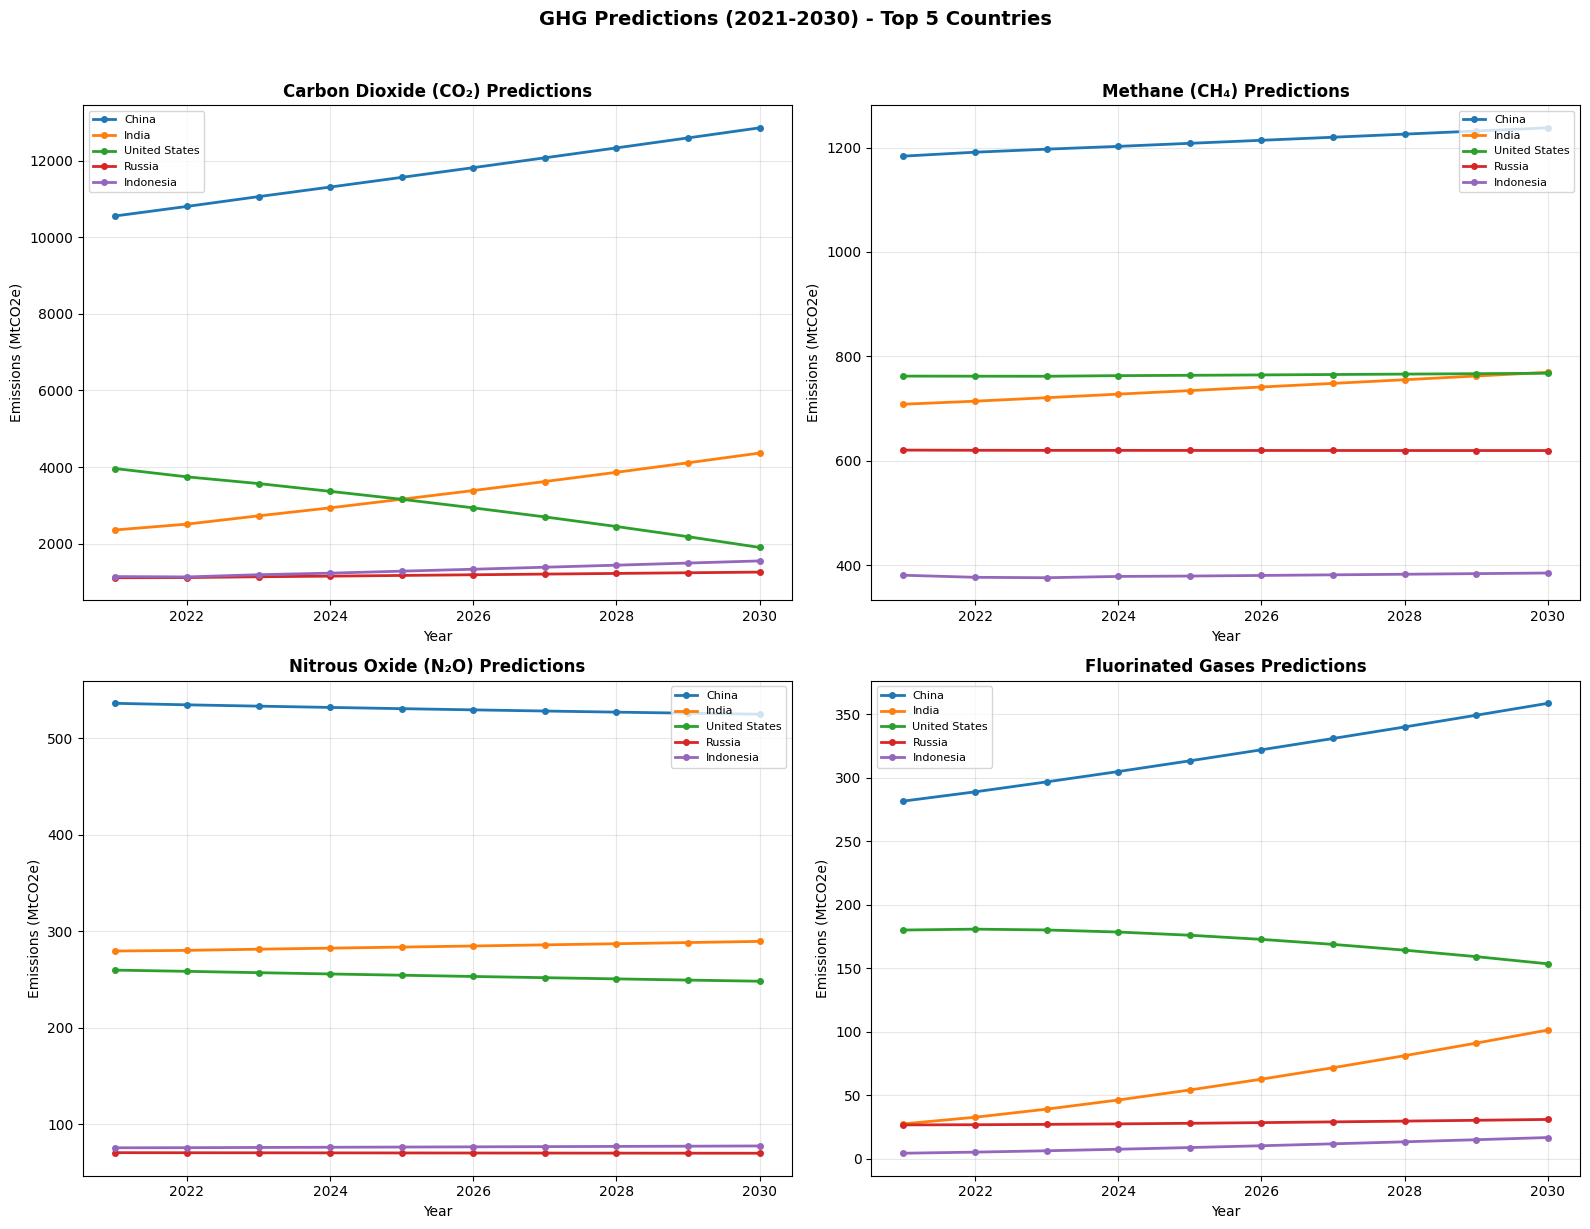

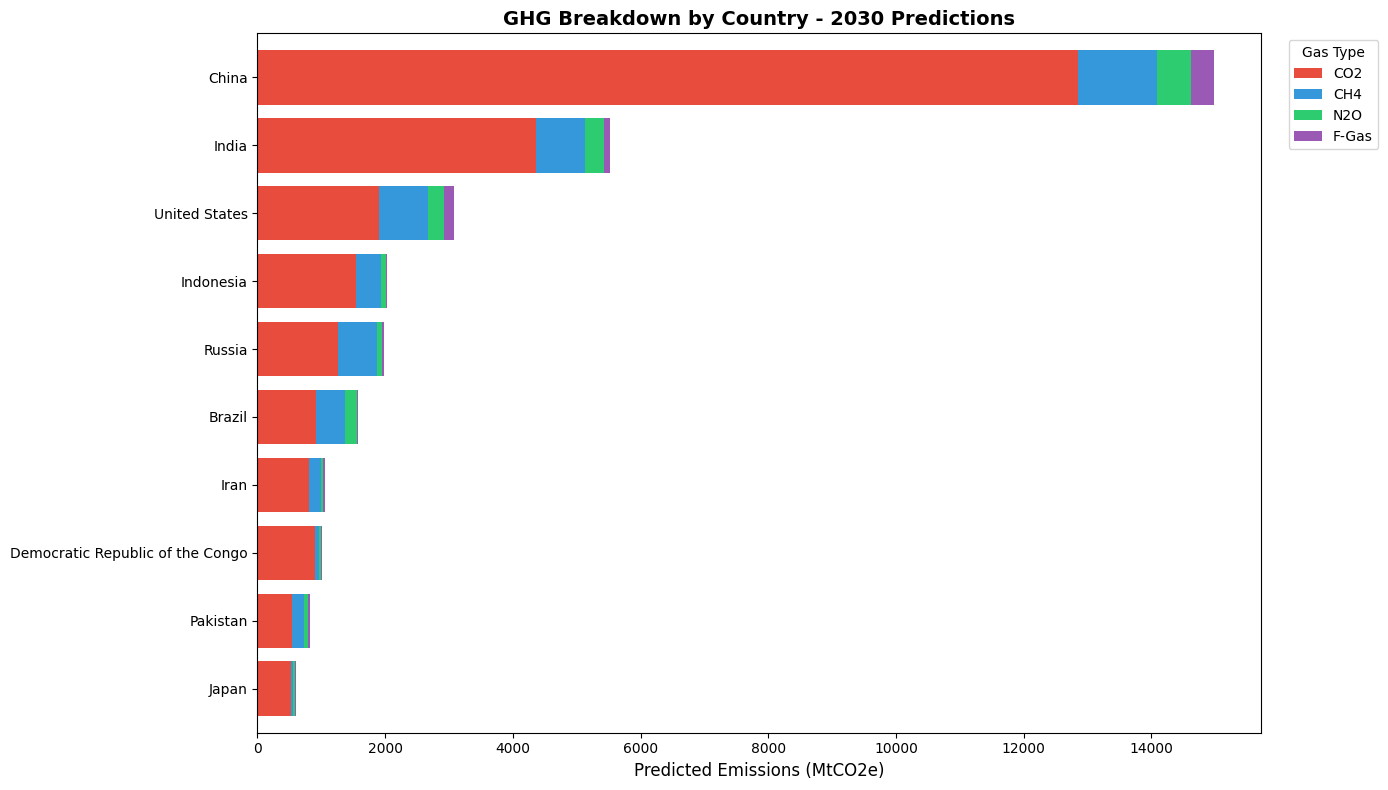

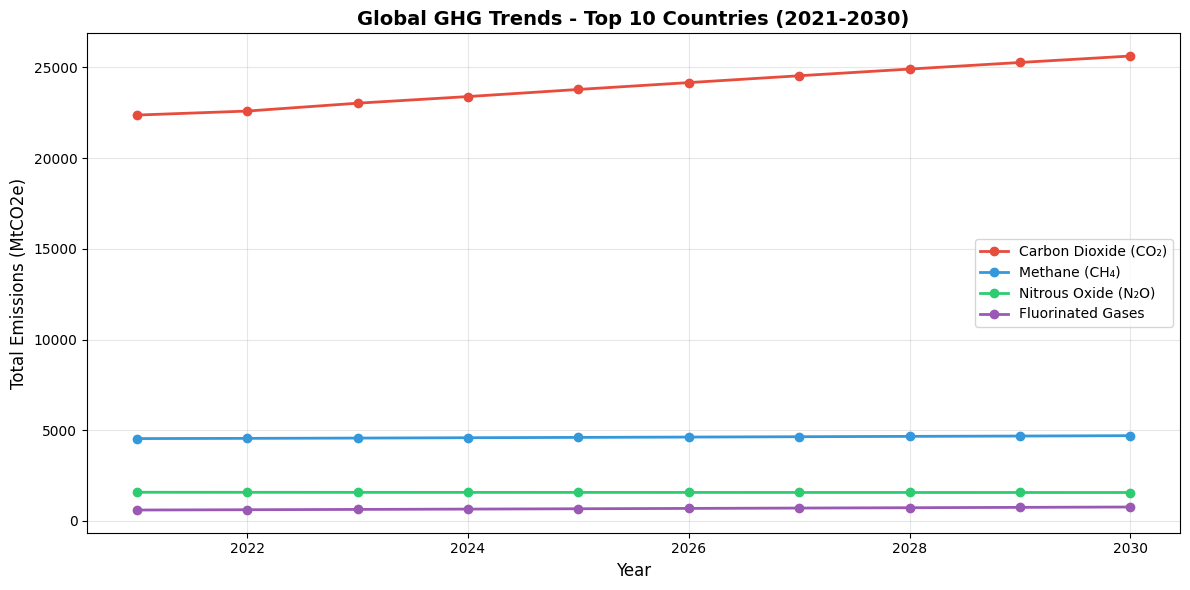


 GHG PREDICTION SUMMARY (2030)

 TOTAL GHG EMISSIONS BY TYPE (2030):
--------------------------------------------------
Carbon Dioxide (CO₂)              25,629.85 MtCO2e ( 78.5%)
Methane (CH₄)                      4,697.81 MtCO2e ( 14.4%)
Nitrous Oxide (N₂O)                1,564.61 MtCO2e (  4.8%)
Fluorinated Gases                    765.39 MtCO2e (  2.3%)
--------------------------------------------------
TOTAL                             32,657.66 MtCO2e

 TOP EMITTER BY GHG TYPE (2030):
------------------------------------------------------------
CO2        China                        12,853.68 MtCO2e
CH4        China                         1,237.79 MtCO2e
N2O        China                           524.96 MtCO2e
F-Gas      China                           358.76 MtCO2e

 GHG Predictions Complete!

 FILES SAVED:
   - ghg_predictions_2021_2030.csv
   - ghg_predictions_by_gas.png
   - ghg_breakdown_2030.png
   - ghg_global_trend_2030.png



In [15]:
# REFORMATTING THE DATA
# Reshape to long format
gas_long = gas_data.melt(
    id_vars=['ISO', 'Country', 'Gas'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Emissions'
)

gas_long['Year'] = gas_long['Year'].astype(int)
gas_long = gas_long.sort_values(['ISO', 'Gas', 'Year']).reset_index(drop=True)

print(f"   Gas data shape: {gas_long.shape}")
print(f"   Countries: {gas_long['Country'].nunique()}")
print(f"   Gas types: {gas_long['Gas'].unique().tolist()}")

# ============================================================================
# STEP 2: MERGE WITH GDP AND POPULATION
# ============================================================================

print("\n STEP 2: Merging with GDP/Population...")

gdp_pop_subset = gdp_pop[['Country Code', 'Year', 'GDP', 'Population', 
                           'GDP_growth_1yr', 'Population_growth_1yr', 'GDP_per_capita']].copy()

gas_merged = gas_long.merge(
    gdp_pop_subset,
    left_on=['ISO', 'Year'],
    right_on=['Country Code', 'Year'],
    how='left'
)

gas_merged = gas_merged.drop(columns=['Country Code'])
print(f"   Merged shape: {gas_merged.shape}")

# ============================================================================
# STEP 3: FEATURE ENGINEERING (NO DATA LEAKAGE)
# ============================================================================

print("\n STEP 3: Creating Features...")

def create_gas_features(df):
    """Create lag and derived features for gas emissions - NO LEAKAGE"""
    df = df.sort_values(['ISO', 'Gas', 'Year']).reset_index(drop=True)
    
    # Emission lag features (uses past values only)
    for lag in [1, 2, 3]:
        df[f'Emissions_lag_{lag}'] = df.groupby(['ISO', 'Gas'])['Emissions'].shift(lag)
    
    # Emission growth rate (based on lagged values)
    df['Emissions_growth'] = (df['Emissions_lag_1'] - df['Emissions_lag_2']) / df['Emissions_lag_2']
    
    # Rolling average of PAST 3 years (excludes current year)
    df['Emissions_rolling_3yr'] = (df['Emissions_lag_1'] + df['Emissions_lag_2'] + df['Emissions_lag_3']) / 3
    
    # Emissions per capita using LAGGED emissions
    df['Emissions_per_capita'] = df['Emissions_lag_1'] / df['Population']
    
    # Emissions intensity using LAGGED emissions
    df['Emissions_intensity'] = df['Emissions_lag_1'] / df['GDP']
    
    return df

gas_features = create_gas_features(gas_merged.copy())

# Fill NaN in growth columns
gas_features['Emissions_growth'] = gas_features['Emissions_growth'].fillna(0)
gas_features['GDP_growth_1yr'] = gas_features['GDP_growth_1yr'].fillna(0)
gas_features['Population_growth_1yr'] = gas_features['Population_growth_1yr'].fillna(0)

# Drop rows with NaN in required features
gas_features = gas_features.dropna(subset=['Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3', 'GDP', 'Population'])

# Handle infinities
gas_features = gas_features.replace([np.inf, -np.inf], 0)

print(f"   Features shape: {gas_features.shape}")

# ============================================================================
# STEP 4: DEFINE FEATURE COLUMNS
# ============================================================================

feature_cols = [
    'Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3',
    'Emissions_growth', 'Emissions_rolling_3yr',
    'GDP', 'GDP_growth_1yr', 'GDP_per_capita',
    'Population', 'Population_growth_1yr',
    'Emissions_per_capita', 'Emissions_intensity'
]

target = 'Emissions'

print(f"\n Features: {feature_cols}")

# ============================================================================
# STEP 5: TRAIN MODELS FOR EACH GAS TYPE
# ============================================================================

print("\n" + "="*70)
print(" STEP 5: TRAINING MODELS (One Per Gas Type)")
print("="*70)

gas_models = {}
gas_scalers = {}
gas_results = {}

for gas in GAS_TYPES:
    print(f"\n{'─'*60}")
    print(f" Training Model for: {gas}")
    print(f"{'─'*60}")
    
    # Filter data for this gas
    gas_df = gas_features[gas_features['Gas'] == gas].copy()
    
    if len(gas_df) < 50:
        print(f"    Insufficient data ({len(gas_df)} rows). Skipping...")
        continue
    
    # Prepare X and y
    X = gas_df[feature_cols]
    y = gas_df[target]
    
    # Time-based split (80-20)
    split_idx = int(len(gas_df) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    print(f"   Train: {len(X_train)} samples | Test: {len(X_test)} samples")
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train multiple models and select best
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
        'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'SVR': SVR(kernel='rbf', C=1.0)
    }
    
    best_model = None
    best_model_name = None
    best_r2 = -999
    
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        r2 = r2_score(y_test, pred)
        mae = mean_absolute_error(y_test, pred)
        
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_model_name = name
            best_mae = mae
    
    # Store best model and scaler
    gas_models[gas] = best_model
    gas_scalers[gas] = scaler
    gas_results[gas] = {
        'model_name': best_model_name,
        'r2': best_r2,
        'mae': best_mae,
        'train_size': len(X_train),
        'test_size': len(X_test)
    }
    
    print(f"    Best Model: {best_model_name}")
    print(f"    R² Score: {best_r2:.4f}")
    print(f"    MAE: {best_mae:,.2f}")

# ============================================================================
# STEP 6: MODEL SUMMARY
# ============================================================================

print("\n" + "="*70)
print(" MODEL PERFORMANCE SUMMARY")
print("="*70)

print(f"\n{'Gas Type':<15} {'Model':<20} {'R²':>10} {'MAE':>15}")
print("-"*60)
for gas, result in gas_results.items():
    print(f"{gas:<15} {result['model_name']:<20} {result['r2']:>10.4f} {result['mae']:>15,.2f}")

# ============================================================================
# STEP 7: GENERATE PREDICTIONS FOR TOP 10 COUNTRIES (2021-2030)
# ============================================================================

print("\n" + "="*70)
print(" STEP 7: GENERATING GHG PREDICTIONS (2021-2030)")
print("="*70)

all_predictions = []

for gas in GAS_TYPES:
    if gas not in gas_models:
        continue
    
    print(f"\n Predicting: {gas}")
    
    model = gas_models[gas]
    scaler = gas_scalers[gas]
    
    gas_df = gas_features[gas_features['Gas'] == gas].copy()
    
    for country_iso in TOP10_COUNTRIES:
        country_data = gas_df[gas_df['ISO'] == country_iso].sort_values('Year')
        
        if country_data.empty:
            continue
        
        country_name = country_data['Country'].iloc[0]
        last_row = country_data.iloc[-1].copy()
        last_year_data = int(last_row['Year'])
        
        # Get GDP/Pop projections for this country
        country_gdp = gdp_pop[gdp_pop['Country Code'] == country_iso].sort_values('Year')
        
        for year in range(max(last_year_data + 1, 2021), 2031):
            # Get GDP and Population for this year
            gdp_row = country_gdp[country_gdp['Year'] == year]
            
            if not gdp_row.empty:
                new_gdp = gdp_row['GDP'].values[0]
                new_pop = gdp_row['Population'].values[0]
                gdp_growth = gdp_row['GDP_growth_1yr'].values[0] if 'GDP_growth_1yr' in gdp_row.columns else 0.025
                pop_growth = gdp_row['Population_growth_1yr'].values[0] if 'Population_growth_1yr' in gdp_row.columns else 0.01
            else:
                # Extrapolate with assumed growth rates
                gdp_growth = 0.025
                pop_growth = 0.01
                new_gdp = last_row['GDP'] * (1 + gdp_growth)
                new_pop = last_row['Population'] * (1 + pop_growth)
            
            # Prepare features
            features = {
                'Emissions_lag_1': last_row['Emissions'],
                'Emissions_lag_2': last_row['Emissions_lag_1'],
                'Emissions_lag_3': last_row['Emissions_lag_2'],
                'Emissions_growth': (last_row['Emissions'] - last_row['Emissions_lag_1']) / last_row['Emissions_lag_1'] if last_row['Emissions_lag_1'] != 0 else 0,
                'Emissions_rolling_3yr': (last_row['Emissions'] + last_row['Emissions_lag_1'] + last_row['Emissions_lag_2']) / 3,
                'GDP': new_gdp,
                'GDP_growth_1yr': gdp_growth if isinstance(gdp_growth, float) else 0.025,
                'GDP_per_capita': new_gdp / new_pop if new_pop > 0 else 0,
                'Population': new_pop,
                'Population_growth_1yr': pop_growth if isinstance(pop_growth, float) else 0.01,
                'Emissions_per_capita': last_row['Emissions'] / new_pop if new_pop > 0 else 0,
                'Emissions_intensity': last_row['Emissions'] / new_gdp if new_gdp > 0 else 0
            }
            
            # Create feature array
            X_pred = np.array([[features[f] for f in feature_cols]])
            X_pred_scaled = scaler.transform(X_pred)
            
            # Predict
            pred_emissions = model.predict(X_pred_scaled)[0]
            pred_emissions = max(0, pred_emissions)  # Ensure non-negative
            
            # Store prediction
            all_predictions.append({
                'ISO': country_iso,
                'Country': country_name,
                'Gas': gas,
                'Year': year,
                'Predicted_Emissions': pred_emissions
            })
            
            # Update last_row for next iteration
            last_row['Emissions_lag_3'] = last_row['Emissions_lag_2']
            last_row['Emissions_lag_2'] = last_row['Emissions_lag_1']
            last_row['Emissions_lag_1'] = last_row['Emissions']
            last_row['Emissions'] = pred_emissions
            last_row['GDP'] = new_gdp
            last_row['Population'] = new_pop
            last_row['Year'] = year

# Create predictions DataFrame
ghg_predictions_df = pd.DataFrame(all_predictions)

print(f"\n Generated {len(ghg_predictions_df)} predictions")
print(f"   Countries: {ghg_predictions_df['ISO'].nunique()}")
print(f"   Gas Types: {ghg_predictions_df['Gas'].nunique()}")
print(f"   Years: {ghg_predictions_df['Year'].min()} - {ghg_predictions_df['Year'].max()}")

# ============================================================================
# STEP 8: SAVE PREDICTIONS
# ============================================================================

ghg_predictions_df.to_csv('ghg_predictions_2021_2030.csv', index=False)
print("\n Saved to: ghg_predictions_2021_2030.csv")

# ============================================================================
# STEP 9: VISUALIZATIONS
# ============================================================================

print("\n STEP 9: Creating Visualizations...")

# 9.1 GHG predictions by gas type (global trends)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']
gas_names = {'CO2': 'Carbon Dioxide (CO₂)', 'CH4': 'Methane (CH₄)', 
             'N2O': 'Nitrous Oxide (N₂O)', 'F-Gas': 'Fluorinated Gases'}

for idx, gas in enumerate(GAS_TYPES):
    ax = axes[idx]
    gas_pred = ghg_predictions_df[ghg_predictions_df['Gas'] == gas]
    
    for country in TOP10_COUNTRIES[:5]:
        country_data = gas_pred[gas_pred['ISO'] == country]
        if not country_data.empty:
            country_name = country_data['Country'].iloc[0]
            ax.plot(country_data['Year'], country_data['Predicted_Emissions'], 
                    marker='o', linewidth=2, markersize=4, label=country_name)
    
    ax.set_title(f'{gas_names.get(gas, gas)} Predictions', fontsize=12, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Emissions (MtCO2e)')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('GHG Predictions (2021-2030) - Top 5 Countries', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('ghg_predictions_by_gas.png', dpi=300, bbox_inches='tight')
plt.show()

# 9.2 GHG breakdown by country in 2030
fig, ax = plt.subplots(figsize=(14, 8))

pivot_2030 = ghg_predictions_df[ghg_predictions_df['Year'] == 2030].pivot_table(
    index='Country',
    columns='Gas',
    values='Predicted_Emissions',
    aggfunc='sum'
).reindex(columns=GAS_TYPES)

pivot_2030['Total'] = pivot_2030.sum(axis=1)
pivot_2030 = pivot_2030.sort_values('Total', ascending=True)
pivot_2030_plot = pivot_2030.drop(columns='Total')

pivot_2030_plot.plot(kind='barh', stacked=True, ax=ax, color=colors, width=0.8)

ax.set_xlabel('Predicted Emissions (MtCO2e)', fontsize=12)
ax.set_ylabel('')
ax.set_title('GHG Breakdown by Country - 2030 Predictions', fontsize=14, fontweight='bold')
ax.legend(title='Gas Type', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig('ghg_breakdown_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# 9.3 Total GHG trend (2021-2030)
fig, ax = plt.subplots(figsize=(12, 6))

global_ghg_trend = ghg_predictions_df.groupby(['Year', 'Gas'])['Predicted_Emissions'].sum().reset_index()

for gas, color in zip(GAS_TYPES, colors):
    data = global_ghg_trend[global_ghg_trend['Gas'] == gas]
    ax.plot(data['Year'], data['Predicted_Emissions'], marker='o', linewidth=2, 
            color=color, label=gas_names.get(gas, gas))

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Emissions (MtCO2e)', fontsize=12)
ax.set_title('Global GHG Trends - Top 10 Countries (2021-2030)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ghg_global_trend_2030.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 10: SUMMARY
# ============================================================================

print("\n" + "="*70)
print(" GHG PREDICTION SUMMARY (2030)")
print("="*70)

# Total by gas in 2030
print("\n TOTAL GHG EMISSIONS BY TYPE (2030):")
print("-"*50)
gas_2030_totals = ghg_predictions_df[ghg_predictions_df['Year'] == 2030].groupby('Gas')['Predicted_Emissions'].sum()
total_2030 = gas_2030_totals.sum()
for gas in GAS_TYPES:
    val = gas_2030_totals.get(gas, 0)
    pct = (val / total_2030) * 100
    print(f"{gas_names.get(gas, gas):<30} {val:>12,.2f} MtCO2e ({pct:>5.1f}%)")
print("-"*50)
print(f"{'TOTAL':<30} {total_2030:>12,.2f} MtCO2e")

# Top emitter per gas in 2030
print("\n TOP EMITTER BY GHG TYPE (2030):")
print("-"*60)
for gas in GAS_TYPES:
    gas_2030 = ghg_predictions_df[(ghg_predictions_df['Gas'] == gas) & (ghg_predictions_df['Year'] == 2030)]
    if not gas_2030.empty:
        top = gas_2030.loc[gas_2030['Predicted_Emissions'].idxmax()]
        print(f"{gas:<10} {top['Country']:<25} {top['Predicted_Emissions']:>12,.2f} MtCO2e")

print("\n GHG Predictions Complete!")
print("""
 FILES SAVED:
   - ghg_predictions_2021_2030.csv
   - ghg_predictions_by_gas.png
   - ghg_breakdown_2030.png
   - ghg_global_trend_2030.png
""")